# Notebook inspired by the lecture _Data Analysis with Python_ by Cognitive Class / IBM

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
path="data/clean/auto.csv"
df = pd.read_csv(path)

In [4]:
# list the number of columns, columns data types and number of rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
symboling            201 non-null int64
normalized-losses    201 non-null int64
make                 201 non-null object
num-of-doors         201 non-null object
body-style           201 non-null object
drive-wheels         201 non-null object
engine-location      201 non-null object
wheel-base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb-weight          201 non-null int64
engine-type          201 non-null object
num-of-cylinders     201 non-null object
engine-size          201 non-null int64
fuel-system          201 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    201 non-null float64
horsepower           201 non-null int64
peak-rpm             201 non-null float64
city-L/100km         201 non-nu

In [5]:
# Overview of the dataset
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111,5000.0,11.190476,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154,5000.0,12.368421,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102,5500.0,9.791667,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115,5500.0,13.055556,10.681818,17450.0,Low,0,1,1,0


## Look for interesting variables

### Continuous numerical variables analysis

In [55]:
#list continuous numerical variables
df_numerics = df.select_dtypes([np.number])
df_numerics.columns.values.tolist()

['symboling',
 'normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-L/100km',
 'highway-L/100km',
 'price',
 'diesel',
 'gas',
 'std',
 'turbo']

In [56]:
# remove dummy variables
df_numerics = df_numerics.drop(["diesel", "gas", "std", "turbo"],axis=1)

#select features with correlation > 0.5
cor = df_numerics.corr()
cor_target = abs(cor["price"])
relevant_features = cor_target[cor_target>0.5]
relevant_features.sort_values()

bore               0.543155
wheel-base         0.584642
length             0.690628
width              0.751265
city-L/100km       0.789898
highway-L/100km    0.801118
horsepower         0.809607
curb-weight        0.834415
engine-size        0.872335
price              1.000000
Name: price, dtype: float64

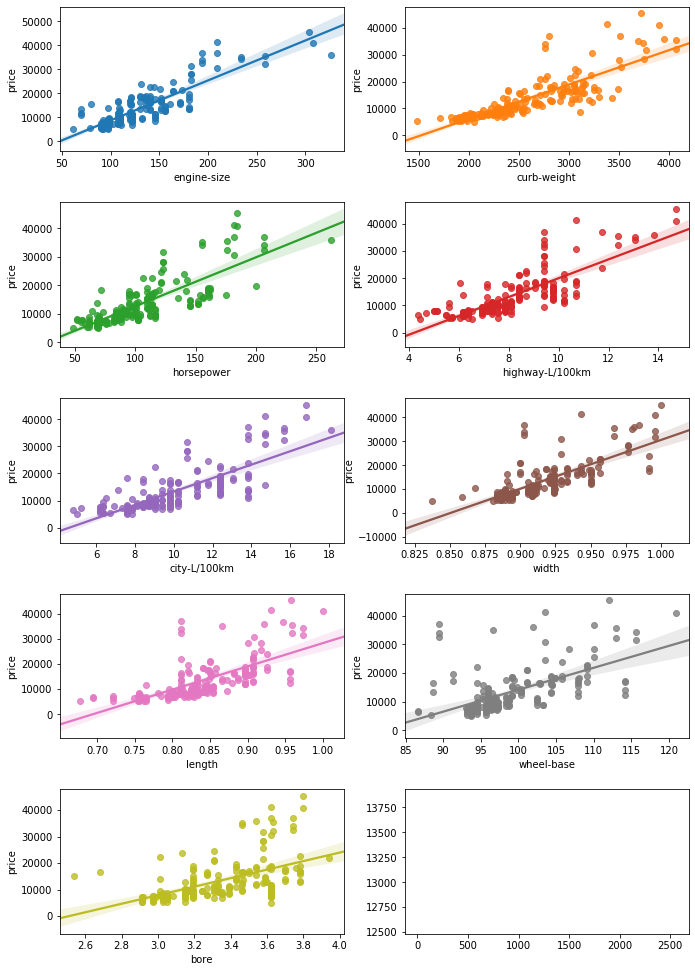

In [105]:
# Let's plot the correlation between 'price' and the most significant variables
fig, axes = plt.subplots(5, 2, figsize=(10, 14))
fig.tight_layout(pad=3.0)
sns.regplot(x='engine-size', y='price', data=df, ax=axes[0][0])
sns.regplot(x='curb-weight', y='price', data=df, ax=axes[0][1])
sns.regplot(x='horsepower', y='price', data=df, ax=axes[1][0])
sns.regplot(x='highway-L/100km', y='price', data=df, ax=axes[1][1])
sns.regplot(x='city-L/100km', y='price', data=df, ax=axes[2][0])
sns.regplot(x='width', y='price', data=df, ax=axes[2][1])
sns.regplot(x='length', y='price', data=df, ax=axes[3][0])
sns.regplot(x='wheel-base', y='price', data=df, ax=axes[3][1])
sns.regplot(x='bore', y='price', data=df, ax=axes[4][0])

### Categorical variables analysis

In [22]:
#list other variables
set(df.columns.values.tolist()) - set(df_numerics.columns.values.tolist())

{'body-style',
 'diesel',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'fuel-system',
 'gas',
 'horsepower-binned',
 'make',
 'num-of-cylinders',
 'num-of-doors',
 'std',
 'turbo'}

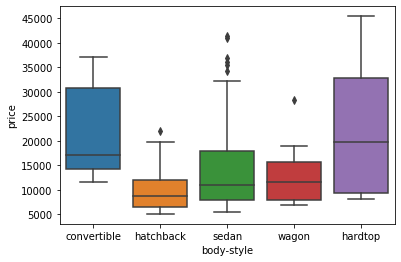

In [112]:
# A good way to visualize categorical variables is by using boxplots
sns.boxplot(x="body-style", y="price", data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

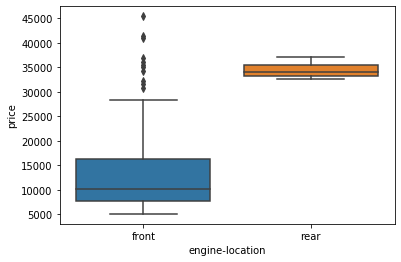

In [113]:
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

Let's plot the other variables:

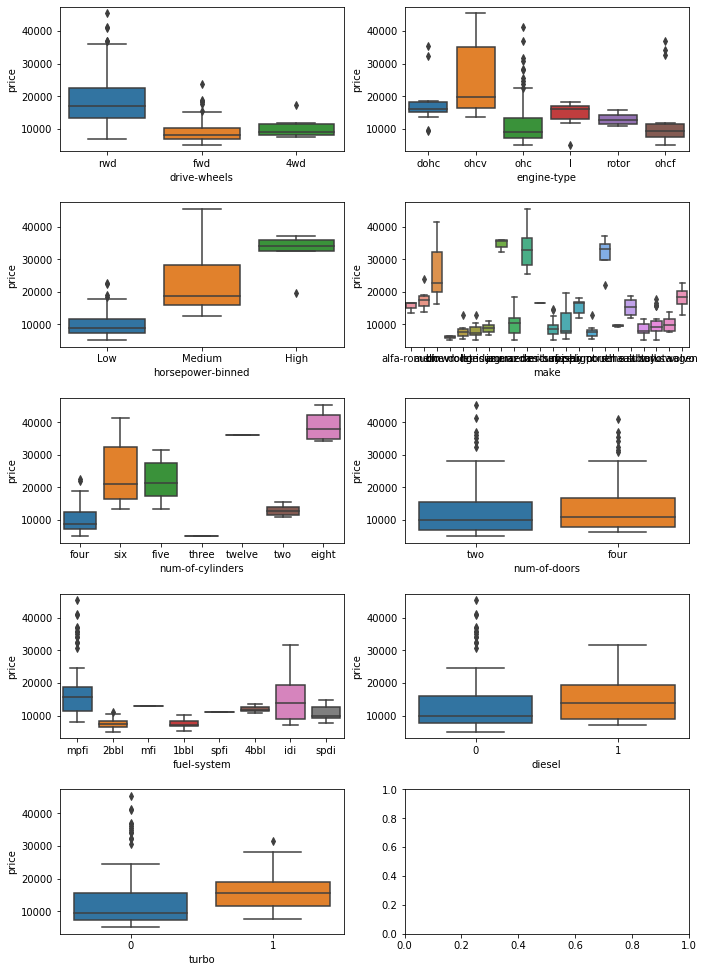

In [25]:
fig, axes = plt.subplots(5, 2, figsize=(10, 14))
fig.tight_layout(pad=3.0)

sns.boxplot(x='drive-wheels', y="price", data=df, ax=axes[0][0])
sns.boxplot(x='engine-type', y="price", data=df, ax=axes[0][1])
sns.boxplot(x='horsepower-binned', y="price", data=df, ax=axes[1][0])
sns.boxplot(x='make', y="price", data=df, ax=axes[1][1])
sns.boxplot(x='num-of-cylinders', y="price", data=df, ax=axes[2][0])
sns.boxplot(x='num-of-doors', y="price", data=df, ax=axes[2][1])
sns.boxplot(x='fuel-system', y="price", data=df, ax=axes[3][0])
sns.boxplot(x='diesel', y="price", data=df, ax=axes[3][1])  # diesel and gas are mutually exclusive so we don't need to plot them both.
sns.boxplot(x='turbo', y="price", data=df, ax=axes[4][0])  # same for turbo and std.

As a first impression, 'drive-wheels' and 'horse-power binned' seem to be excellent discriminator while 'turbo', 'diesel' and 'num-of-door' don't seem to be helpful. Other variables like 'make' would probably useful with an aditional work of grouping the makers for example.
Some variables might become more significative after the grouping.

## Descriptive Statistical Analysis

The describe function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

This will show:
- the count of that variable
- the mean
- the standard deviation (std)
- the minimum value
- the IQR (Interquartile Range: 25%, 50% and 75%)
- the maximum value

The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follow

In [26]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


Value-counts is a good way of understanding how many units of each characteristic/variable we have. We can apply the "value_counts" method on the column 'drive-wheels'. Don’t forget the method "value_counts" only works on Pandas series, not Pandas Dataframes. 

Note: We can convert the result to a Dataframe using the to_frame() function.

In [31]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [33]:
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,value_counts
engine-location,
front,198
rear,3


Examining the value counts of the engine location would not be a good predictor variable for the price. This is because we only have three cars with a rear engine and 198 with an engine in the front, this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

## Grouping
The "groupby" method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [39]:
df_group = df[['drive-wheels','body-style','price']]
df_group = df_group.groupby(['drive-wheels','body-style'],as_index=False).mean()
df_group

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


We can convert the dataframe to a pivot table using the method "pivot " to create a pivot table from the groups and improve the readability.

In [43]:
grouped_pivot = df_group.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well. 

Warning: missing data is quite a complex subject, this is only an example.

In [45]:
grouped_pivot_filled = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot_filled

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

### Heatmap to visualize the relationship between, 'drive-wheels', 'body style' and 'price'.

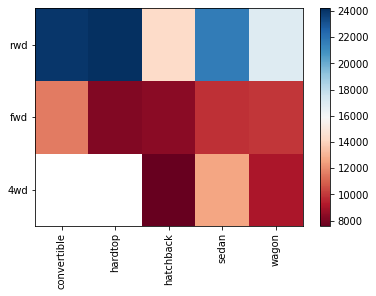

In [44]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Correlation and Causation

**Correlation:** a measure of the extent of interdependence between variables.
**Causation:** the relationship between cause and effect between two variables.

It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler the determining causation as causation may require independent experimentation.

#### Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: Total positive linear correlation.
- 0: No linear correlation, the two variables most likely do not affect each other.
- -1: Total negative linear correlation.

Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64' variables.

#### P-value
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the
- p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  <  0.1: there is weak evidence that the correlation is significant.
- the p-value is  >  0.1: there is no evidence that the correlation is significant.

We can obtain this information using "stats" module in the "scipy" library. Let's use it on our variables with the better correlation score:

In [49]:
from scipy import stats

def print_pearson_correlation(df, column): 
    pearson_coef, p_value = stats.pearsonr(df[column], df['price'])
    print(f"The Pearson Correlation Coefficient between '{column}' and 'price' is {pearson_coef} with a P-value of P={p_value}")  

The Pearson Correlation Coefficient between 'horsepower' and 'price' is 0.8096068016571054 with a P-value of P=6.273536270650504e-48
The Pearson Correlation Coefficient between 'curb-weight' and 'price' is 0.8344145257702846 with a P-value of P=2.1895772388936914e-53
The Pearson Correlation Coefficient between 'engine-size' and 'price' is 0.8723351674455185 with a P-value of P=9.265491622198389e-64


In [ ]:
columns = ('horsepower', 'curb-weight', 'engine-size')
for column in columns:
    print_pearson_correlation(df, column)

Since the p-value is < 0.001, the correlation between those variables and price are statistically significant, and the coefficient of > 0.8 shows that the relationship is positive and quite strong.

In [57]:
print_pearson_correlation(df, 'height')

The Pearson Correlation Coefficient between 'height' and 'price' is 0.13548630756805993 with a P-value of P=0.05514627325101262


On the opposite, for height, a p-value > 0.05 indicate a weak evidence that the correlation is significant and the coefficient of 0.14 shows that the relationship is positive and quite weak. It is easy to verify graphically.

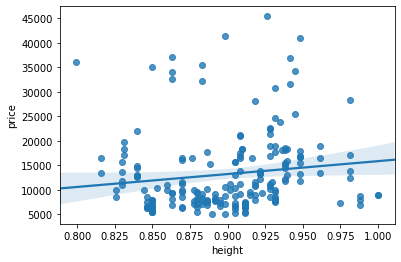

In [58]:
sns.regplot(x='height', y='price', data=df)

### ANOVA: Analysis of Variance
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score:** ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value:** P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.

In [60]:
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [62]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [63]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)

f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])  
print("ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23
ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333
ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:
- engine-size
- curb-weight
- horsepower
- highway-L/100km
- city-L/100km
- width
- length
- Wheel-base
- Bore

Categorical variables:
- Drive-wheels
- horsepower-binned (however, this variable is derived for horsepower so we should use one or the other).

## Note:
This notebook  has been adapted from a notebook written by Mahdi Noorian PhD, Joseph Santarcangelo, Bahare Talayian, Eric Xiao, Steven Dong, Parizad, Hima Vsudevan and Fiorella Wenver and Yi Yao.

Joseph Santarcangelo is a Data Scientist at IBM, and holds a PhD in Electrical Engineering. His research focused on using Machine Learning, Signal Processing, and Computer Vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.